In [18]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Load the pickled data
data = pd.read_pickle(os.path.join('Data', 'aggregated_data.pkl'))

# Select 'utilizationRate_total' column from the DataFrame
data = data[['utilizationRate_total']]  # This keeps it as a DataFrame, not a Series

data.index = pd.to_datetime(data.index)
data = data[data.index.year == 2021]

data.index.freq = 'H'

data['utilizationRate_total'].replace(0, np.nan, inplace=True)
data['utilizationRate_total'].fillna(method='bfill', inplace=True)
data['utilizationRate_total'].fillna(method='ffill', inplace=True)

data.index = pd.to_datetime(data.index).tz_localize(None)

# Now 'data' is a DataFrame, so you can work with it directly
print(data.head())
print(data['utilizationRate_total'].isna().sum())
print(data.shape)



                     utilizationRate_total
start_hour                                
2021-01-01 00:00:00               0.002005
2021-01-01 01:00:00               0.002005
2021-01-01 02:00:00               0.002005
2021-01-01 03:00:00               0.002005
2021-01-01 04:00:00               0.002005
0
(6152, 1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29717 entries, 2018-04-25 04:00:00-07:00 to 2021-09-14 08:00:00-07:00
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   activeSessions_site2     29717 non-null  int64  
 1   utilizationRate_site2    29717 non-null  float64
 2   kWhDelivered_site2       29717 non-null  float64
 3   idleRate_site2           29717 non-null  float64
 4   blockedRate_site2        29717 non-null  float64
 5   activeSessions_site1     29717 non-null  int64  
 6   utilizationRate_site1    29717 non-null  float64
 7   kWhDelivered_site1       29717 non-null  float64
 8   idleRate_site1           29717 non-null  float64
 9   blockedRate_site1        29717 non-null  float64
 10  activeSessions_total     29717 non-null  int64  
 11  kWhDelivered_total       29717 non-null  float64
 12  utilizationRate_total    29717 non-null  float64
 13  idleRate_total           2971

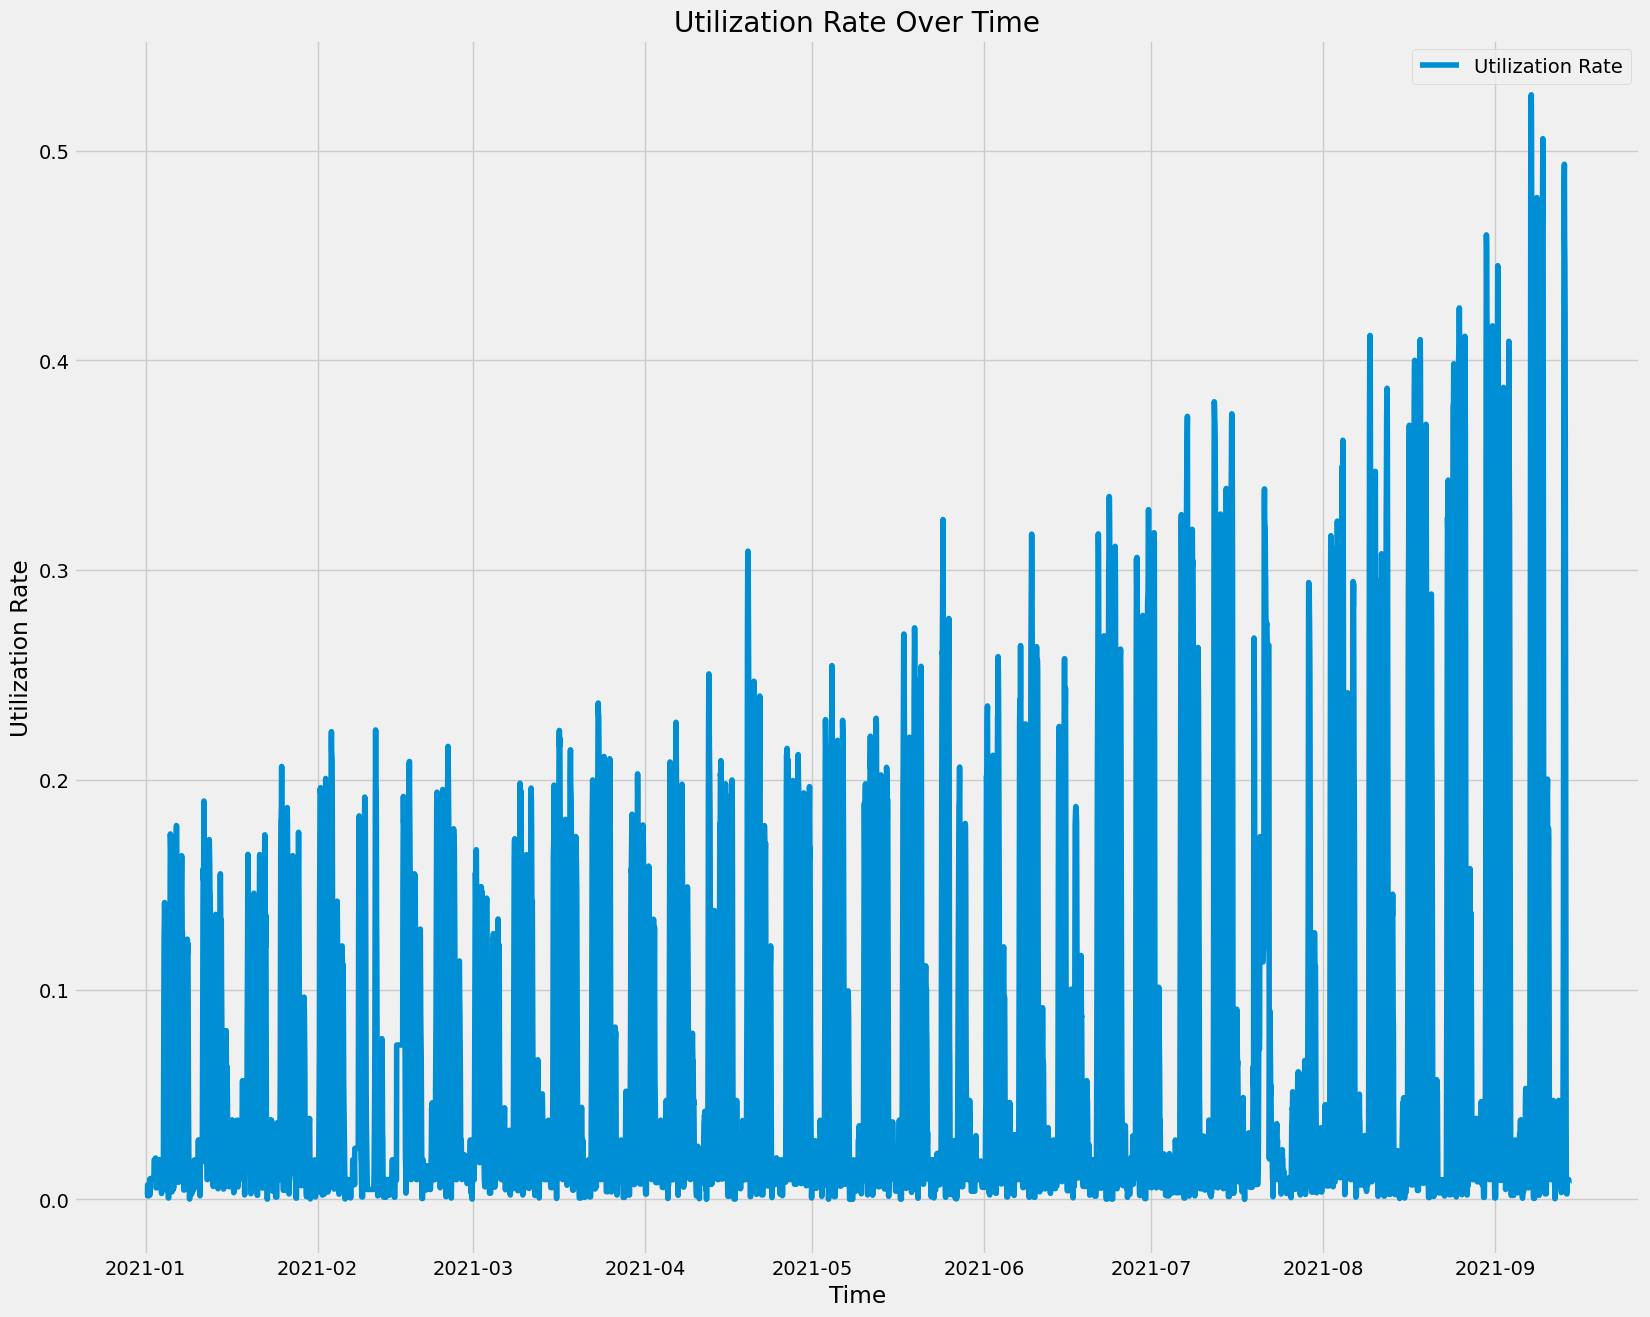

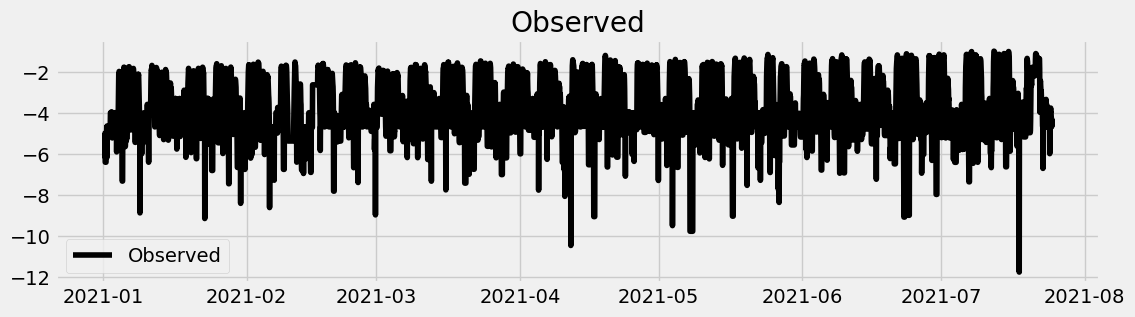

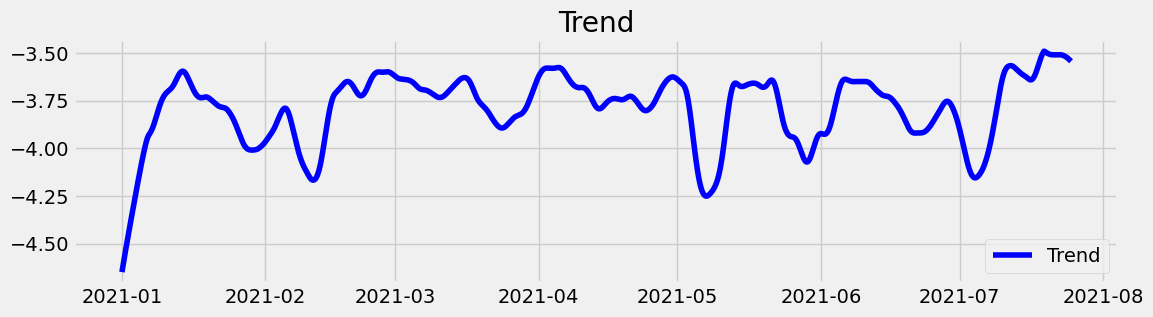

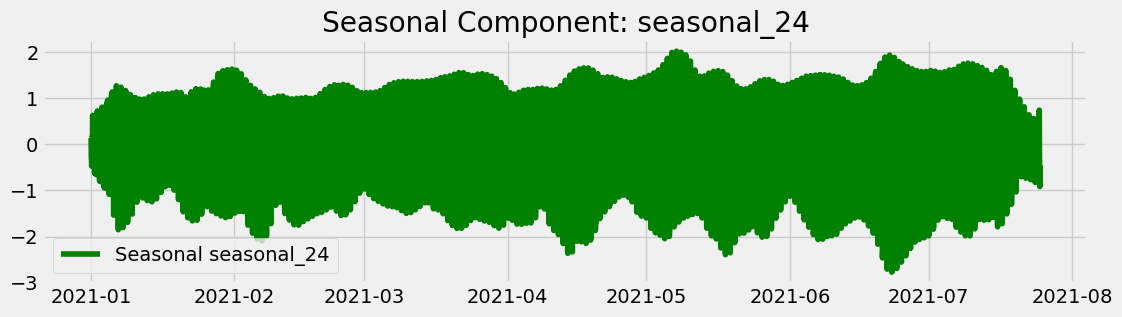

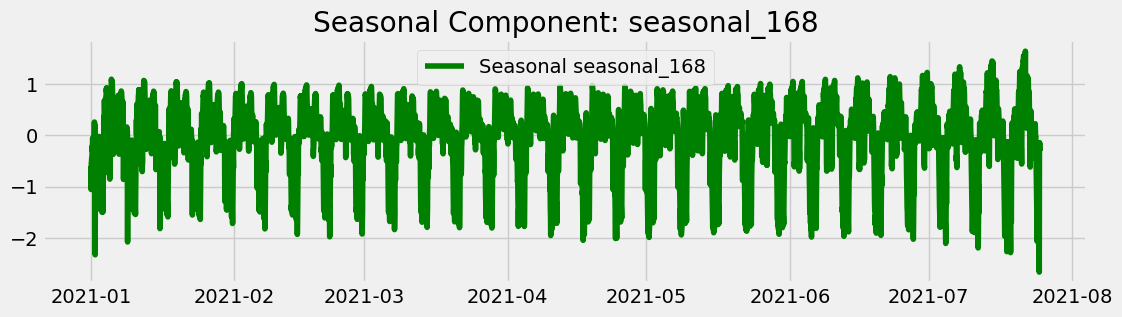

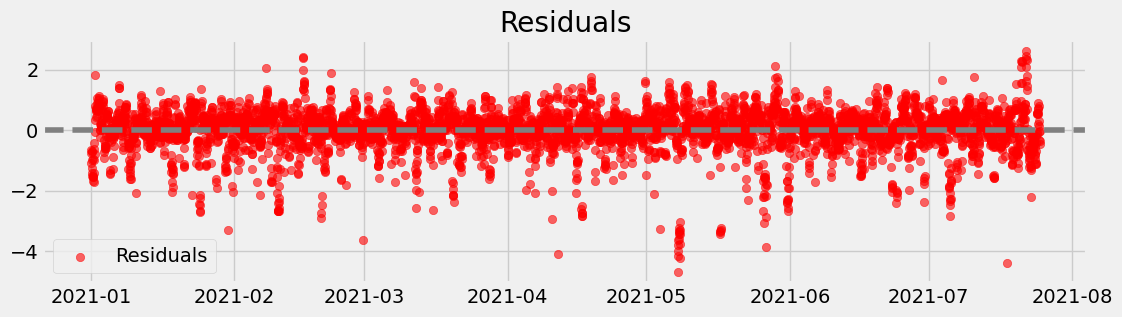

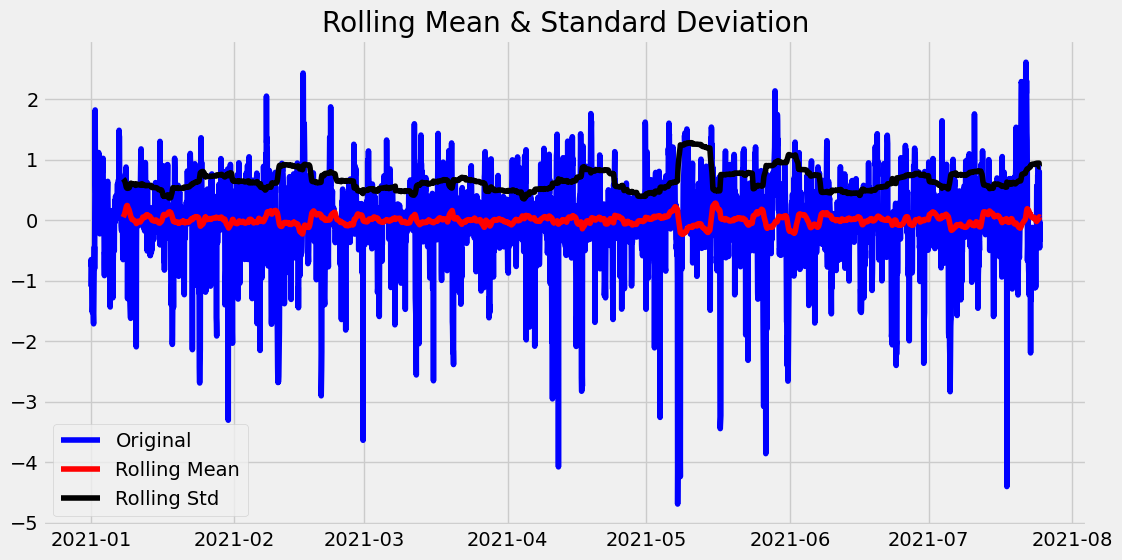

Results of Dickey-Fuller Test:

Test Statistic                -1.382347e+01
p-value                        7.827125e-26
#Lags Used                     2.400000e+01
Number of Observations Used    4.896000e+03
Critical Value (1%)           -3.431686e+00
Critical Value (5%)           -2.862131e+00
Critical Value (10%)          -2.567084e+00
dtype: float64


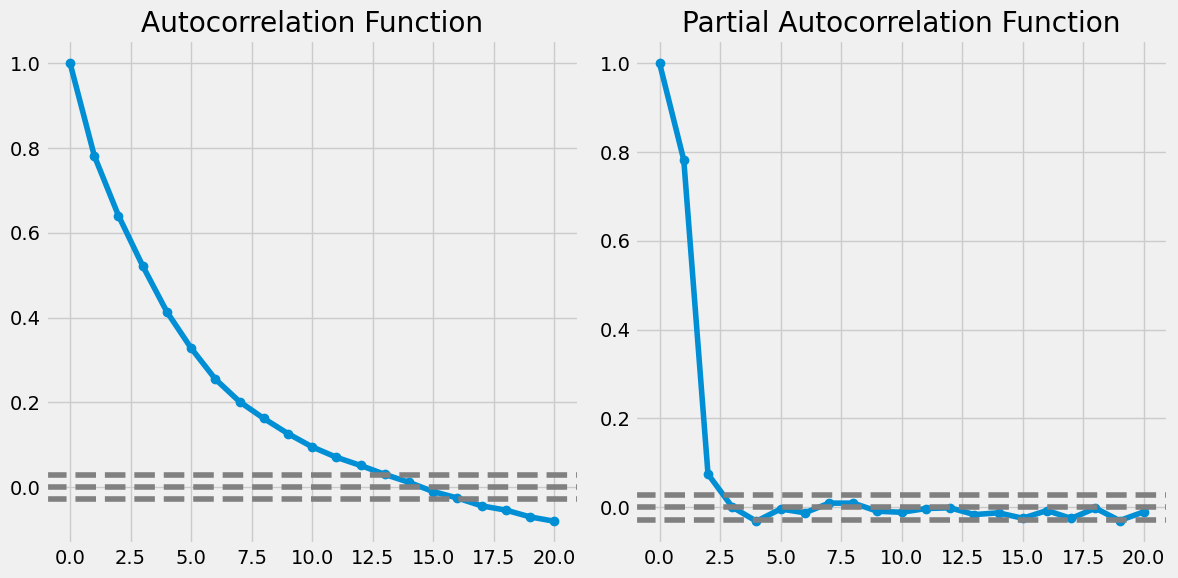

                                 SARIMAX Results                                 
Dep. Variable:     utilizationRate_total   No. Observations:                 4921
Model:                    ARIMA(2, 1, 2)   Log Likelihood               -4425.392
Date:                   Tue, 28 Jan 2025   AIC                           8860.784
Time:                           02:02:12   BIC                           8893.290
Sample:                                0   HQIC                          8872.186
                                  - 4921                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9314      0.000   7537.061      0.000       1.931       1.932
ar.L2         -0.9996      0.000  -4041.764      0.000      -1.000      -0.999
ma.L1         -1.9301      0

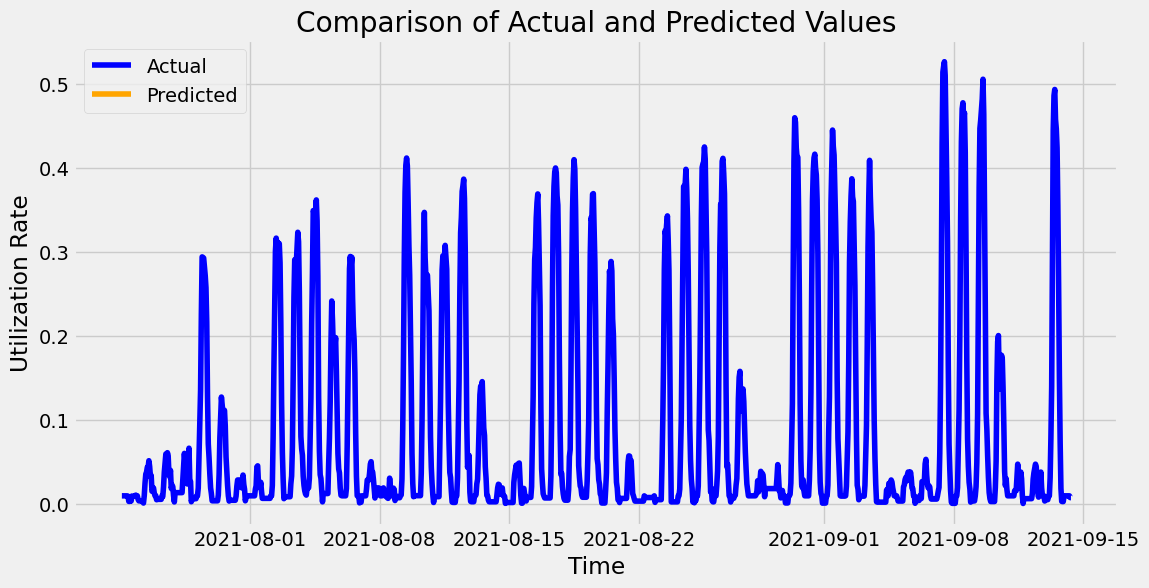

In [19]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['figure.figsize'] = (12, 10)
# supress versioning warnings of keras
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["KERAS_BACKEND"] = "torch"
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

charging_data = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data = pd.read_pickle(os.path.join('Data', 'weather_data.pkl'))

agg_charging_data = pd.read_pickle(os.path.join('Data', 'aggregated_data.pkl'))
agg_charging_data['year'] = agg_charging_data.index.year

#print(agg_charging_data.head(), '\n Data Types: \n',agg_charging_data.dtypes )
print(agg_charging_data.info())
# Load the pickled data
data = pd.read_pickle(os.path.join('Data', 'aggregated_data.pkl'))

# Select 'utilizationRate_total' column from the DataFrame
data = data[['utilizationRate_total']]  # This keeps it as a DataFrame, not a Series

data.index = pd.to_datetime(data.index)
data = data[data.index.year == 2021]

data.index.freq = 'H'

data['utilizationRate_total'].replace(0, np.nan, inplace=True)
data['utilizationRate_total'].fillna(method='bfill', inplace=True)
data['utilizationRate_total'].fillna(method='ffill', inplace=True)

data.index = pd.to_datetime(data.index).tz_localize(None)

# Now 'data' is a DataFrame, so you can work with it directly
print(data.head())
print(data['utilizationRate_total'].isna().sum())
print(data.shape)

# Plot the DataFrame
plt.figure(figsize=(18, 15))
plt.plot(data, label='Utilization Rate')
plt.title('Utilization Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.grid(True)
plt.legend()
plt.show()

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, shuffle=False)

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=168).mean()
    rolstd = timeseries.rolling(window=168).std()

    # Plot rolling statistics:
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:\n')
    dftest = adfuller(timeseries.dropna())
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

ts_log = np.log(train['utilizationRate_total'])

from statsmodels.tsa.seasonal import MSTL

res = MSTL(ts_log, periods=(24, 24*7)).fit()
# Extract components from the res object
observed = res.observed
trend = res.trend
seasonal = res.seasonal
residuals = res.resid

# Plot observed data
plt.figure(figsize=(12, 3))
plt.plot(observed, label='Observed', color='black')
plt.title('Observed')
plt.legend()
plt.show()

# Plot trend
plt.figure(figsize=(12, 3))
plt.plot(trend, label='Trend', color='blue')
plt.title('Trend')
plt.legend()
plt.show()

# Plot each seasonal component
for col in seasonal.columns:
    plt.figure(figsize=(12, 3))
    plt.plot(seasonal[col], label=f'Seasonal {col}', color='green')
    plt.title(f'Seasonal Component: {col}')
    plt.legend()
    plt.show()

# Plot residuals
plt.figure(figsize=(12, 3))
plt.scatter(residuals.index, residuals, label='Residuals', color='red', alpha=0.6)
plt.axhline(0, linestyle='--', color='gray')
plt.title('Residuals')
plt.legend()
plt.show()

# Decomposition complete
residuals.dropna(inplace=True)
test_stationarity(residuals)

# ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(residuals, nlags=20)
lag_pacf = pacf(residuals, nlags=20, method='ols')

# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(lag_acf, marker='o')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf, marker='o')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# ARIMA model fitting and evaluation
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Fit the ARIMA model
p, d, q = 2, 1, 2
model = ARIMA(ts_log, order=(p, d, q))
model_fitted = model.fit()
print(model_fitted.summary())

# Step 2: Forecast the test set
forecast = model_fitted.forecast(steps=len(test))
predicted_log = pd.Series(forecast, index=test.index)

# Reverse decomposition to reconstruct the predicted series
# Ensure the seasonal index is aligned with the test index
if not seasonal.index.isin(test.index).any():
    print("Warning: Seasonal component indices do not match test data!")
seasonal_aligned = seasonal.reindex(test.index).sum(axis=1)

# Add the seasonal component back
predicted_log = predicted_log + seasonal_aligned.fillna(0)

# Transform predictions back to the original scale
predicted = np.exp(predicted_log)

# Align the test dataset to the predicted values
test_original = test['utilizationRate_total'].reindex(predicted.index)

# Handle any NaN values after alignment
predicted = predicted.fillna(method='bfill').fillna(method='ffill')
test_original = test_original.fillna(method='bfill').fillna(method='ffill')

# Step 3: Evaluate the model
# rmse = np.sqrt(mean_squared_error(test_original, predicted))
# r2 = r2_score(test_original, predicted)
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"R2 Score: {r2}")

# Step 4: Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_original.index, test_original, label='Actual', color='blue')
plt.plot(predicted.index, predicted, label='Predicted', color='orange')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.legend()
plt.grid(True)
plt.show()